In [23]:
!pip install eep153_tools --upgrade
!pip install python-gnupg
!pip install eep153_tools
%pip install cfedemands

import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets


Note: you may need to restart the kernel to use updated packages.


In [24]:
Panama_Data = '1tYmqzz4VqM5rd4aeO6zB4wL9ADcoTdvTPKZF5zgX7a4'

In [25]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

x = read_sheets(Panama_Data,sheet='Food Expenditures (1997)')
x = x.set_index(['i','t','m','j']).squeeze()


# Now prices
p = read_sheets(Panama_Data,sheet='Food Prices (1997)').set_index(['t','m','j','u'])

# Compute medians of prices for particular time, place and unit
p = p.groupby(['t','m','j','u']).median()

# Just keep metric units
p = p.xs('kg',level="u").squeeze().unstack('j')

# Drop prices for goods we don't have expenditures for
#p = p[x.index.levels[-1]].T

# Household characteristics
d = read_sheets(Panama_Data,sheet="Household Characteristics")
d.columns.name = 'k'

# Fill blanks with zeros
d = d.replace(np.nan,0)

# Expenditures x may have duplicate columns
x = x.T.groupby(['i','t','m','j']).sum()
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x)

d.set_index(['i','t','m'],inplace=True)

In [26]:
from cfe import Regression

result = Regression(y=y,d=d)

In [27]:
result.predicted_expenditures()

i         t     m        j                          
1997125   1997  Herrera  Aceite Vegetal                 3.496013
                         Ahí Verde                      0.691715
                         Ajo                            0.753810
                         Alimento Infantil              3.781761
                         Apio                           0.580884
                                                          ...   
19976669  1997  Panamá   Viscera De Res                 2.617021
                         Visceras De Pollo O Gallina    3.008887
                         Yuca                           0.613914
                         Zanahoria                      1.053022
                         Ñame                           1.628102
Length: 285318, dtype: float64

<Axes: xlabel='yhat', ylabel='y'>

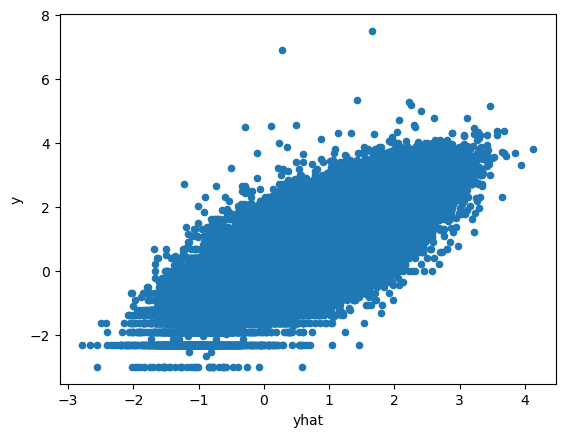

In [28]:
%matplotlib inline
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

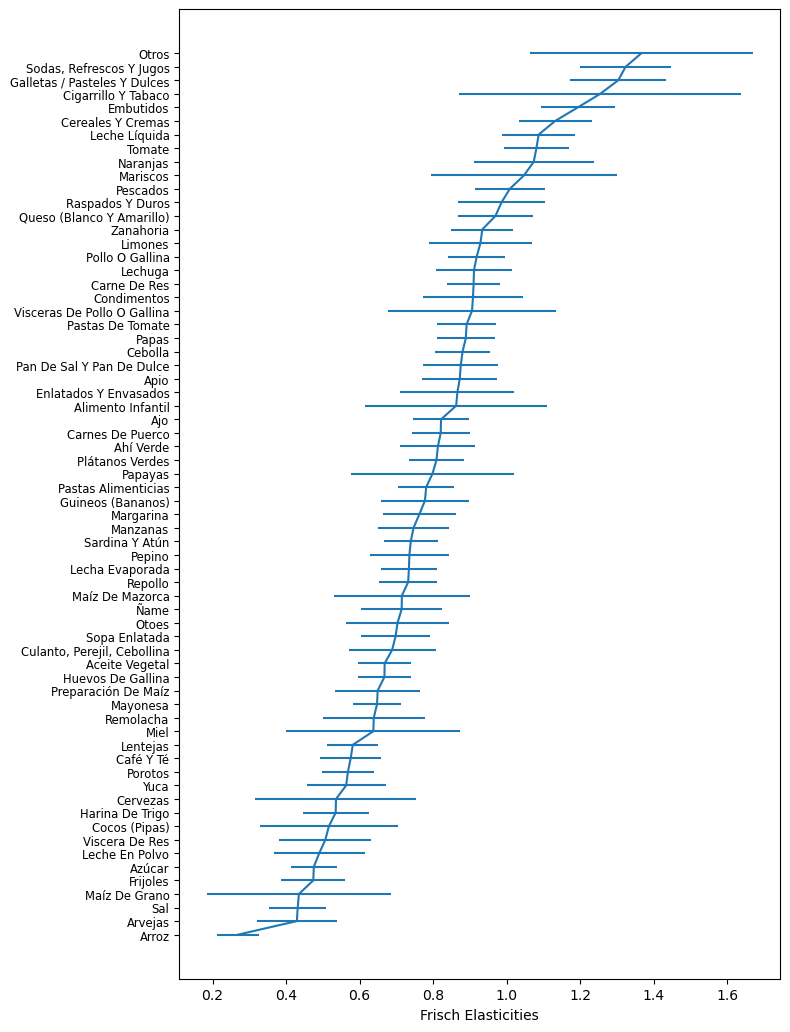

In [29]:
ax = result.graph_beta()

In [30]:
result.get_beta()

j
Aceite Vegetal                 0.667868
Ahí Verde                      0.812623
Ajo                            0.821264
Alimento Infantil              0.862291
Apio                           0.872172
                                 ...   
Viscera De Res                 0.506624
Visceras De Pollo O Gallina    0.905405
Yuca                           0.563158
Zanahoria                      0.933256
Ñame                           0.714139
Name: beta, Length: 66, dtype: float64

In [31]:
result.get_gamma()

k,men,women,girls,boys,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize,Constant
j,,,,,,,,,,,,,,,,,,,,
Aceite Vegetal,-0.053316,-0.011634,-0.037504,-0.061769,-0.075056,-0.146035,-0.033811,-0.073160,-0.058834,-0.077840,-0.018387,-0.030793,-0.014539,0.057840,0.052724,0.145700,0.032817,0.075150,0.483200,0.976377
Ahí Verde,0.083805,0.040163,-0.032336,-0.075127,0.061402,0.013855,-0.021057,-0.017944,0.035313,0.021195,0.058185,0.005850,-0.046268,-0.005615,-0.050697,-0.030084,-0.028200,0.020569,0.210849,-0.566696
Ajo,-0.076952,0.002992,-0.019668,-0.028448,-0.074378,-0.104240,-0.098023,-0.087162,-0.075481,-0.033963,-0.024211,-0.008303,0.051326,0.039500,0.063433,0.101783,0.051934,0.075710,0.326366,-0.600299
Alimento Infantil,-0.037244,0.090659,-0.004793,-0.012324,0.045546,-0.036616,-0.055895,-0.039000,-0.237473,-0.040247,-0.066975,0.099583,0.002690,-0.013979,0.168651,0.000428,0.093886,0.115699,-0.072628,1.391962
Apio,-0.065393,0.007235,0.008080,0.010816,-0.045821,-0.041896,-0.064590,-0.073492,-0.110987,-0.087741,0.000729,0.013638,0.067756,0.052878,0.018301,0.095884,0.080034,0.056043,0.197862,-0.801004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viscera De Res,-0.003628,0.110183,-0.051445,0.094936,-0.094701,0.060266,-0.070061,0.074542,-0.037156,-0.000948,-0.052346,0.078226,0.129603,-0.079643,0.033550,0.003420,0.182418,-0.077124,0.056284,0.827064
Visceras De Pollo O Gallina,-0.168091,0.084438,-0.149562,0.092293,-0.227249,0.042494,-0.168647,0.103266,-0.358993,0.009767,-0.063501,0.098104,0.155086,-0.171797,0.191724,-0.066839,0.395783,-0.080119,0.441732,0.601433
Yuca,0.084867,0.134119,0.019942,0.121991,-0.032018,-0.024214,0.045172,0.051269,-0.015886,0.084322,0.014205,0.136208,0.044340,-0.022941,0.062144,-0.059516,0.088902,-0.011068,-0.185630,-0.737626


<Axes: ylabel='Density'>

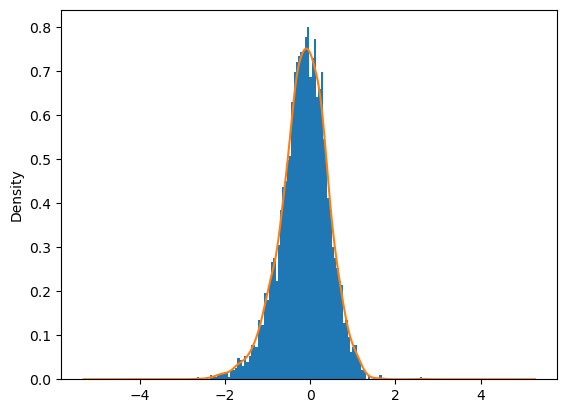

In [32]:
ax = result.get_w().plot.hist(bins=100,density=True)
result.get_w().plot.kde(ax=ax)

In [33]:
result.to_pickle('Panama_estimates.rgsn')